# Pymaceuticals Inc.

---

### Analysis

1. Per Correlation coefficient and linear regression model, it is noticed that the volume of tumor increases with increase in weight of mouse. 
2. Capomulin treatment on mouse l509 takes effect at 20 day timepoint. Line chart of Capomulin treatment displays increase of tumor volume after being exposed to the Drug & doesn't take effect until the 20th day of treatment.
3. Total count of mice used in this study is 248

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.columns

# # Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results,how="left", on=["Mouse ID","Mouse ID"])


# # Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Checking the number of mice.

mouse_count = len(pd.unique(mouse_study["Mouse ID"]))
mouse_count


249

In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Identical_data = mouse_study[mouse_study.duplicated(["Mouse ID", "Timepoint"], keep = False)]
Drop_mouse = Identical_data["Mouse ID"].unique()[0]
Drop_mouse

'g989'

In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
Identical_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study.loc[mouse_study["Mouse ID"]!=Drop_mouse]
mouse_study_clean


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Checking the number of mice in the clean DataFrame.
mouse_study_clean_count = len(mouse_study_clean["Mouse ID"].unique())
mouse_study_clean_count

248

## Summary Statistics


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mouse_grouped = mouse_study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mouse_grouped

numpy_mean = mouse_grouped.mean()
numpy_mean

numpy_median = mouse_grouped.median()
numpy_median

var_numpy = mouse_grouped.var()
var_numpy

sd_numpy = mouse_grouped.std()
sd_numpy

#Ask instructor about stats meaning of sem
mouse_sem_df = mouse_grouped.sem()
mouse_sem_df

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [27]:
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame()
summary_statistics["Mean"] = numpy_mean
summary_statistics["Median"] = numpy_median
summary_statistics["Variance"] = var_numpy
summary_statistics["Standard deviation"] = sd_numpy
summary_statistics["SEM of the tumor volume"] = mouse_sem_df

summary_statistics 

,Mean,Median,Variance,Standard deviation,SEM of the tumor volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_statistics_table = mouse_study_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median",'var','std','sem']})
summary_statistics_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts


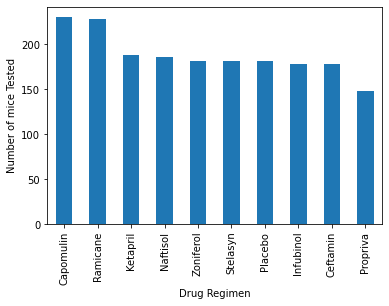

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

Timepoint_df = mouse_study_clean.groupby("Drug Regimen")["Timepoint"].count()
Timepoint_df.sort_values(ascending=False,inplace=True)

ax = Timepoint_df.plot.bar(x='Drug Regimen')
plt.xticks(rotation='vertical')
plt.ylabel('Number of mice Tested')

plt.show()


In [30]:
Timepoint_df.index

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype='object', name='Drug Regimen')

Text(0, 0.5, 'Number of mice Tested')

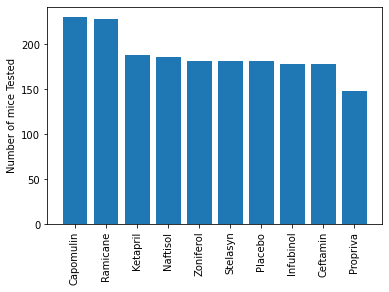

In [31]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(height=Timepoint_df.values, x=Timepoint_df.index)
plt.xticks(rotation='vertical')
plt.ylabel('Number of mice Tested')

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


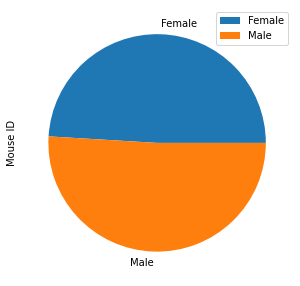

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

df = mouse_study_clean.groupby("Sex").count()

plot = df.plot.pie(y='Mouse ID', figsize=(5,5))
df


([<matplotlib.patches.Wedge at 0x1e58debd4c8>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')])

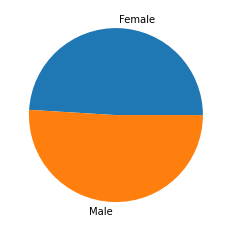

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df.reset_index(inplace=True)

Sex = ["Male", "Female"]
plt.pie(x=df['Mouse ID'],labels = df['Sex'])

## Quartiles, Outliers and Boxplots


In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

groups = mouse_study_clean.groupby(["Drug Regimen", "Mouse ID"])

drug_temp = []
mouse_temp = []
final_tumor_size = []

for (drug_regimen, mouse_id), df in groups:
    if drug_regimen in drug_list:
        out = df.sort_values('Timepoint', ascending=False)['Tumor Volume (mm3)'].head(1).values[0]
        drug_temp.append(drug_regimen)
        mouse_temp.append(mouse_id)
        final_tumor_size.append(out)
        
# print(drug_temp, mouse_temp, final_tumor_size)
final_tumor_size_df = pd.DataFrame({
    'Drug Regimen': drug_temp, 
    'Mouse ID': mouse_temp, 
     'Final Tumor Vol': final_tumor_size
})

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_study_timepoint = pd.merge(mouse_study_clean, final_tumor_size_df, how="left", on=["Drug Regimen","Mouse ID"])
mouse_study_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Vol
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,NaN
1876,z969,Naftisol,Male,9,30,30,65.841013,3,NaN
1877,z969,Naftisol,Male,9,30,35,69.176246,4,NaN
1878,z969,Naftisol,Male,9,30,40,70.314904,4,NaN


In [35]:
# Put treatments into a list for for loop (and later for plot labels)

Drug_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

Tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    
for drug in Drug_list:
    
    x =  mouse_study_timepoint.loc[mouse_study_timepoint["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    
    quantiles = x.quantile([.25, .75])
    lowerq = quantiles[0.25]
    upperq = quantiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
      
    # Determine outliers using upper and lower bounds
    out = x.loc[(x < lower_bound) | (x > upper_bound)]
    Tumor_vol_data.append(out)
    print(f"{drug}'s potential outliers: {out}")

Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


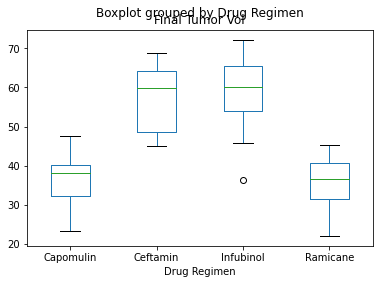

In [36]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
df = final_tumor_size_df
df.boxplot(by='Drug Regimen', column = 'Final Tumor Vol', grid=False)


## Line and Scatter Plots


Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

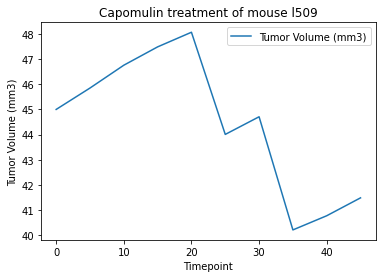

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = 'l509'
df = mouse_study_clean
df.loc[df['Mouse ID'] == mouse_id].plot(x='Timepoint', y='Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse_id}')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

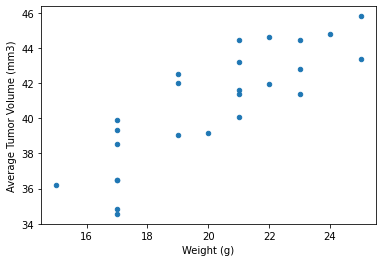

In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df = mouse_study_clean
out = df.loc[df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').mean()

out.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression


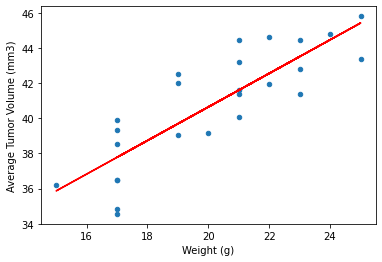

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from scipy import stats
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress( out['Weight (g)'], out['Tumor Volume (mm3)'])
pe_fit = pe_slope * out['Weight (g)'] + pe_int

out.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(out['Weight (g)'], pe_fit, 'r')